In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from scipy.stats import  pearsonr
sys.path.append('..')

In [2]:
plt.rcParams['font.size'] = '16'
plt.rcParams['font.family'] = 'Times New Roman'

In [3]:
df = pd.read_excel('reports/isotopes/SD_2013_IND_&_DEP_FIXED.xlsx')

0.5970757973354754 1.496225374195614e-06


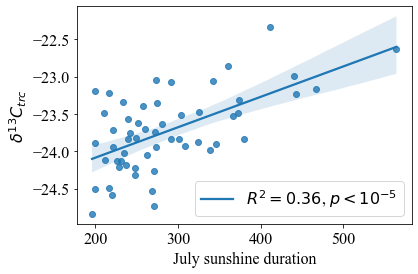

In [6]:
r, p = pearsonr(df['Real'], df['IND+DEP_13C'])
print(r,p)
sns.regplot(data=df, x='Real', y='IND+DEP_13C', line_kws={'label': f'$R^2={r**2:.2f}$, $p<10^{{-5}}$'})
plt.xlabel('July sunshine duration')
plt.ylabel('$\delta^{13}C_{trc}$')
plt.legend()
plt.savefig(
    'reports/isotopes_scatterplot/d13C.png',
    facecolor='white',
    transparent=False,
    dpi=300,
    bbox_inches='tight'
)

0.6401389115948375 1.4212069322437106e-07


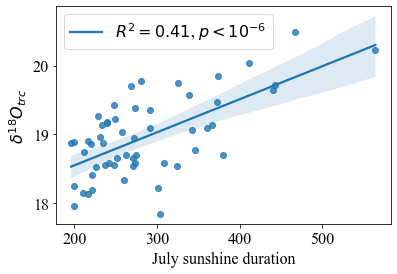

In [8]:
r, p = pearsonr(df['Real'], df['IND+DEP_18O'])
print(r,p)
sns.regplot(
    data=df,
    x='Real',
    y='IND+DEP_18O',
    line_kws={'label': f'$R^2={r**2:.2f}$, $p<10^{{-6}}$'})
plt.xlabel('July sunshine duration')
plt.legend()
plt.ylabel('$\delta^{18}O_{trc}$')
plt.savefig(
    'reports/isotopes_scatterplot/d18O.png',
    facecolor='white',
    transparent=False,
    dpi=300,
    bbox_inches='tight'
)

0.7443444782512605 7.344294992043734e-11


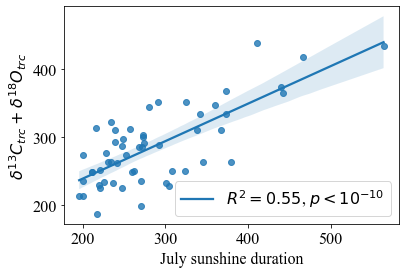

In [9]:
r, p = pearsonr(df['Real'], df['Predicted_model'])
print(r,p)
sns.regplot(data=df, x='Real', y='Predicted_model', line_kws={'label': f'$R^2={r**2:.2f}$, $p<10^{{-10}}$'})
plt.xlabel('July sunshine duration')
plt.ylabel('$\delta^{13}C_{trc}+\delta^{18}O_{trc}$')
plt.legend()
plt.savefig(
    'reports/isotopes_scatterplot/model_prediction.png',
    facecolor='white',
    transparent=False,
    dpi=300,
    bbox_inches='tight'
)

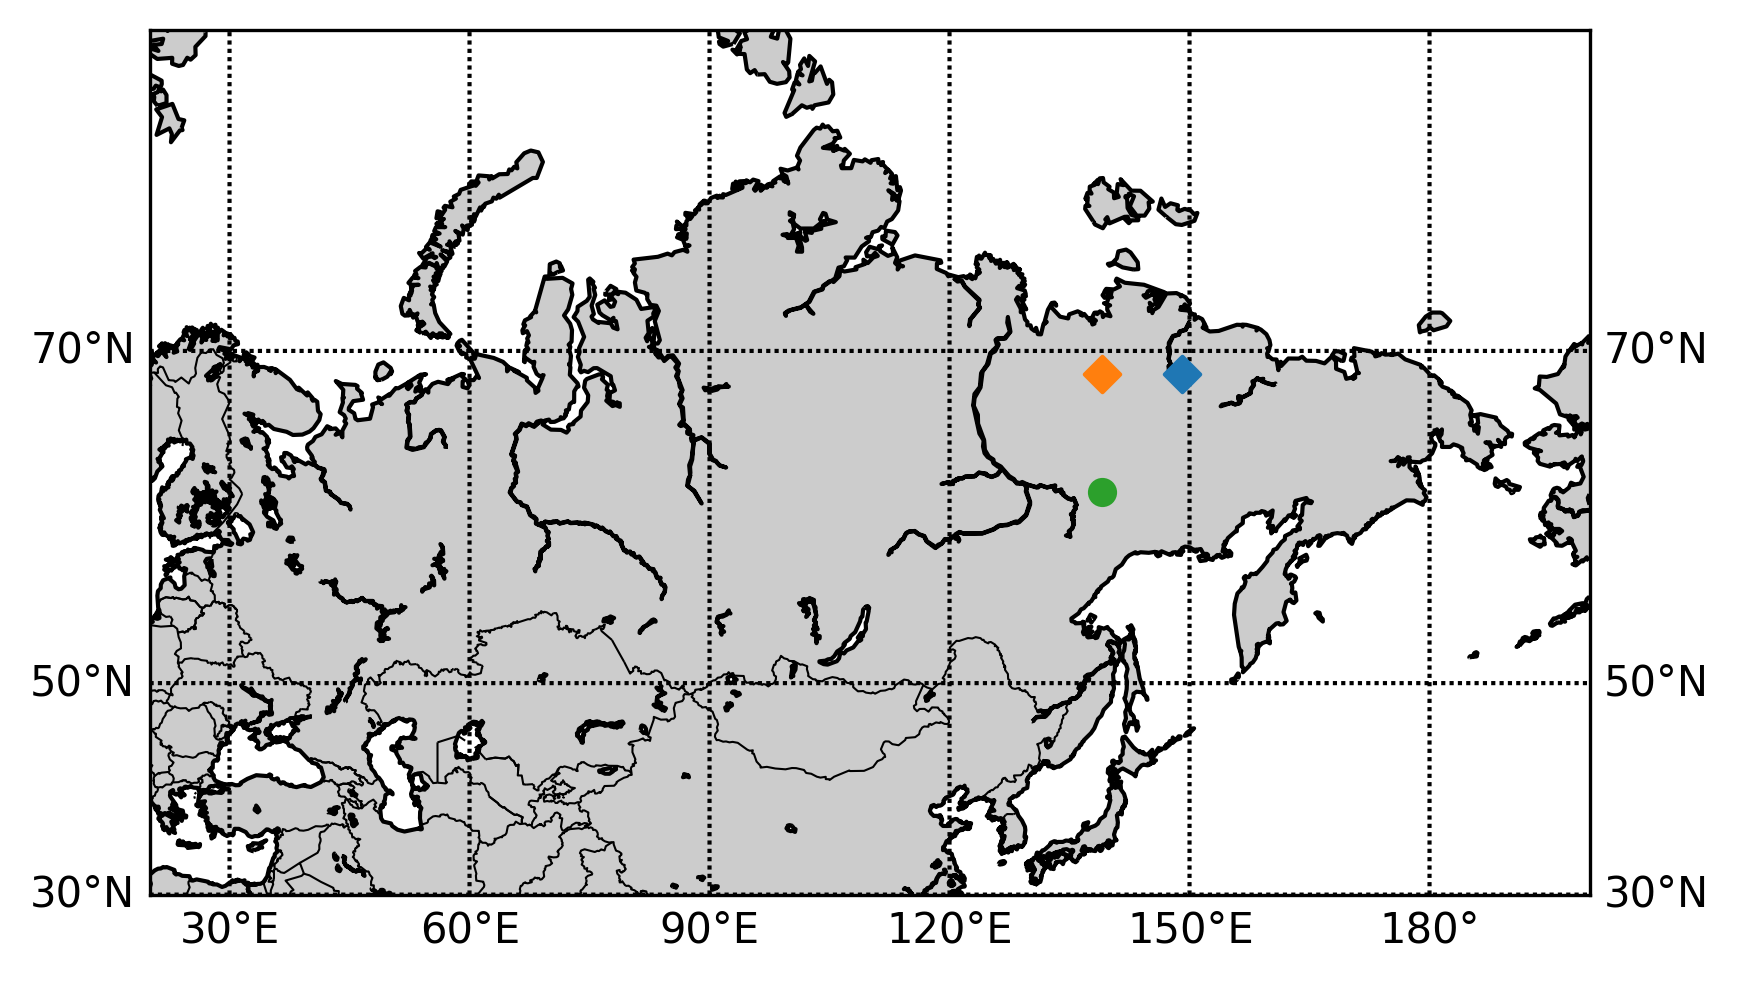

In [3]:
from mpl_toolkits.basemap import Basemap  
import numpy as np
import matplotlib.pyplot as plt
# create new figure, axes instances.
fig=plt.figure(dpi=300)
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=20.,llcrnrlat=30.,urcrnrlon=200.,urcrnrlat=80.,
            resolution='l',projection='merc',\
            )

m.drawcountries()
m.drawcoastlines()
m.fillcontinents()
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

x, y = m(149.0, 69.0)
m.scatter(x,y, zorder=3, alpha=1, label=f'YAK', marker='D')

x, y = m(139.0, 69.0)
m.scatter(x,y, zorder=3, alpha=1, label=f'DEP', marker='D')

x, y = m(139.0, 63.0)
m.scatter(x,y, zorder=3, alpha=1, label=f'Chokurdakh', marker='o')

#plt.legend()
plt.show()

In [5]:
clim_ind =  pd.read_csv(f'../data/processed/climate/Chokurdakh.csv')

In [6]:
merged_df = pd.merge(clim_ind, df, on='Year', how='inner')

In [14]:
from enum import Enum

In [15]:
class Months(Enum):
    January   = 1
    February  = 2
    March     = 3
    April     = 4
    May       = 5
    June      = 6
    July      = 7
    August    = 8
    September = 9
    October   = 10
    November  = 11
    December  = 12

    def __str__(self):
        return self.name

In [16]:
stats = ['Precipitation', 'Relative Humidity', 'Sunshine Duration', 'Temperature', 'VPD']

In [17]:
from typing import (
    Iterable
)

from numpy import (
    array,
    isnan,
    logical_or,
)
from scipy.stats import (
    pearsonr,
)



def dropna(x: Iterable, y: Iterable) -> tuple[array, array]:
    x, y = array(x), array(y)
    nas = logical_or(isnan(x), isnan(y))
    x, y = x[~nas], y[~nas]
    return x, y


def dropna_pearsonr(x: Iterable, y: Iterable) -> tuple[float, float]:
    x, y = dropna(x, y)
    r, p = pearsonr(x, y)
    return r, p

In [18]:
from copy import deepcopy

In [19]:
result_r = {
    'Precipitation vs $\delta^{13}C$' :[],
    'Precipitation vs $\delta^{18}O$' :[],
    'Precipitation vs Model' : [],
    'Relative Humidity vs $\delta^{13}C$':[],
    'Relative Humidity vs $\delta^{18}O$':[],
    'Relative Humidity vs Model':[],
    'Sunshine Duration vs $\delta^{13}C$': [],
    'Sunshine Duration vs $\delta^{18}O$': [],
    'Sunshine Duration vs Model': [],
    'Temperature vs $\delta^{13}C$': [],
    'Temperature vs $\delta^{18}O$': [],
    'Temperature vs Model': [],
    'VPD vs $\delta^{13}C$': [],
    'VPD vs $\delta^{18}O$': [],
    'VPD vs Model': [],
}
result_p = deepcopy(result_r)

for month in list(range(9, 13))+list(range(1, 9)):
    month_name = Months(month).name
    print(month_name)
    loc_df = merged_df[merged_df['Month']==month].copy().reset_index(drop=True)
    if month > 8:
        loc_df[stats] = loc_df[stats].shift()
    
    for stat in stats:
        if len(loc_df.dropna())<2:
            result_r[stat+' vs $\delta^{13}C$'].append(0)
            result_p[stat+' vs $\delta^{13}C$'].append(1)
            result_r[stat+' vs $\delta^{18}O$'].append(0)
            result_p[stat+' vs $\delta^{18}O$'].append(1)
            result_r[stat+' vs Model'].append(0)
            result_p[stat+' vs Model'].append(1)
            continue
        
        r, p = dropna_pearsonr(loc_df[stat], loc_df['IND+DEP_13C'])
        result_r[stat+' vs $\delta^{13}C$'].append(r)
        result_p[stat+' vs $\delta^{13}C$'].append(p)

        r, p = dropna_pearsonr(loc_df[stat], loc_df['IND+DEP_18O'])
        result_r[stat+' vs $\delta^{18}O$'].append(r)
        result_p[stat+' vs $\delta^{18}O$'].append(p)

        r, p = dropna_pearsonr(loc_df[stat], loc_df['Predicted_model'])
        result_r[stat+' vs Model'].append(r)
        result_p[stat+' vs Model'].append(p)

September
October
November
December
January
February
March
April
May
June
July
August


In [20]:
index = []
for month in list(range(9, 13))+list(range(1, 9)):
    index.append(Months(month).name)

In [21]:
r_df = pd.DataFrame(result_r)
r_df['Month'] = index
r_df.set_index('Month', inplace=True)

p_df = pd.DataFrame(result_p)
p_df['Month'] = index
p_df.set_index('Month', inplace=True)

In [111]:
r_df.T.to_excel('reports/isotopes_scatterplot/correlations_R.xlsx')
p_df.T.to_excel('reports/isotopes_scatterplot/correlations_p.xlsx')

In [22]:
_default_clustermap_kwargs = {
        'cmap': "seismic",
        'col_cluster': False,
        'row_cluster': False,
        'linewidths': 1,
        'linecolor': 'gray',
        'cbar_pos': (0.09, .7, .05, .18),
        'cbar_kws': {'ticks': [-.6, -.3, 0, .3, .6]},
        'vmin': -0.8, 'vmax': 0.8,
        'dendrogram_ratio': (0.2, 0.05)
    }

"plt.savefig(\n    '../reports/isotopes_scatterplot/heatmap.png',\n    facecolor='white',\n    transparent=False,\n    dpi=300,\n    bbox_inches='tight'\n)"

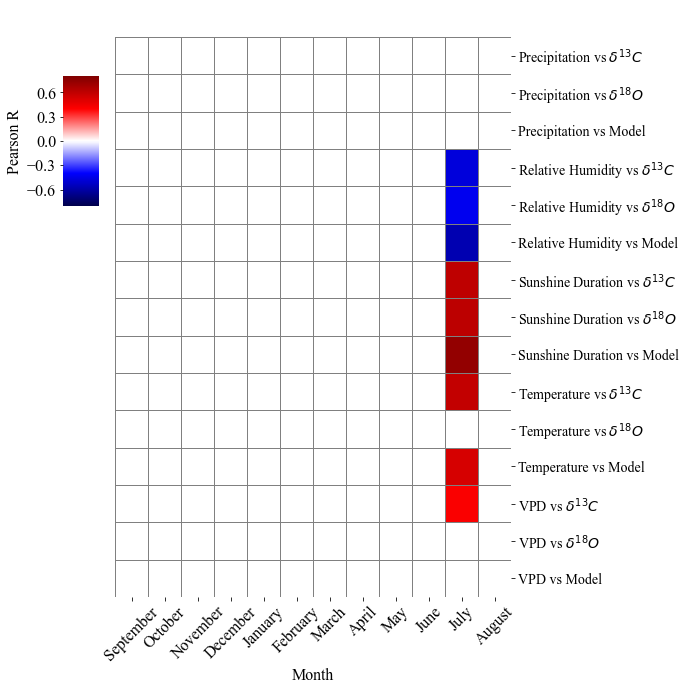

In [24]:
hm = sns.clustermap(
    data=r_df.T.fillna(0),
    mask=p_df.T.fillna(1) > 0.01,
    #yticklabels=stats.index,
    **_default_clustermap_kwargs
)
#hm.ax_heatmap.set_title('Pearson R', fontsize = 20)
hm.ax_heatmap.set_xlabel('Month', fontsize = 16)
hm.ax_heatmap.set_xticklabels(hm.ax_heatmap.get_xticklabels(), rotation = 45)
hm.ax_heatmap.yaxis.set_tick_params(labelsize=14)

#hm.ax_heatmap.set_ylabel('Site code', fontsize = 16)
hm.ax_cbar.set_ylabel('Pearson R')
hm.ax_cbar.yaxis.tick_left()
hm.ax_cbar.yaxis.set_label_position("left")
"""plt.savefig(
    'reports/isotopes_scatterplot/heatmap.png',
    facecolor='white',
    transparent=False,
    dpi=300,
    bbox_inches='tight'
)"""